# load module

In [ ]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

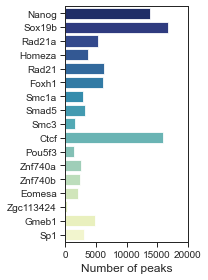

In [ ]:
peak_num_ls_nanog = []
for tf in nanog_cluster_tf_df_percent.index :
    peak_num_ls_nanog.append(peak_num_dict[tf])
    
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (3,4), tight_layout = True)
    sns.barplot(y = nanog_cluster_tf_df_percent.index.tolist(),
                x = peak_num_ls_nanog, 
                palette = 'YlGnBu_r',
                orient = 'h')
    ax.set_xlim(0,20000)
#     ax.set_xscale('log')
    ax.set_xlabel('Number of peaks')
    fig.savefig(f'/mnt/Storage/home/wangyiman/early_embryo_network/figures/make7_bar_TFPeakNum_Nanog.pdf',transparent=True)

# fragment length distibution

In [ ]:
fragment_len_df = {}

In [ ]:
for k in ['KI_sox19bMyc', 'IgG'] :
    fragment_len_df[k] = pd.read_table(f'/mnt/Storage/home/wangyiman/knock_in_Sun/2_signal/{k}_20220429_fragments_length.txt', 
                                       sep = '\t', header = 0)
fragment_len_df[k]

,fragment_length,number
0,20,1
1,21,5
2,22,5
3,23,2
4,24,7
...,...,...
476,496,3524
477,497,3622
478,498,3578
479,499,3497


In [ ]:
for k in ['Sox19b_dome_rep1', 'Sox19b_dome_rep2', 'Sox19b_dome_rep3'] :
    fragment_len_df[k] = pd.read_table(f'/mnt/Storage/home/wangyiman/knock_in_Sun/2_signal/{k}_fragments_length.txt',
                                       sep = '\t', header = 0)
    
fragment_len_df[k]

,fragment_length,number
0,20,1587
1,21,2627
2,22,3704
3,23,4708
4,24,5608
...,...,...
476,496,7756
477,497,7879
478,498,7743
479,499,7790


In [ ]:
fragment_len_df_50bp = {}
for k in ['KI_sox19bMyc', 'IgG', 'Sox19b_dome_rep1', 'Sox19b_dome_rep2', 'Sox19b_dome_rep3'] :
    tmp_df = fragment_len_df[k].copy()
    tmp_df['50bp'] = [int(x) for x in tmp_df['fragment_length'] / 50]
    tmp_df['frag_len_interval'] = [f'{int((x-1)/50) * 50 + 1}~{int((x-1)/50 + 1) * 50}'  for x in tmp_df['fragment_length']]
    fragment_len_df_50bp[k] = tmp_df.groupby('frag_len_interval').sum().reset_index().sort_values(['50bp'])
    fragment_len_df_50bp[k].iloc[0,0] = '20~50'
    
fragment_len_df_50bp[k]

,frag_len_interval,fragment_length,number,50bp
2,20~50,1085,523210,1
9,51~100,3775,3321414,51
0,101~150,6275,3132544,101
1,151~200,8775,3603691,151
3,201~250,11275,3161873,201
4,251~300,13775,1830509,251
5,301~350,16275,1160628,301
6,351~400,18775,1019965,351
7,401~450,21275,744804,401
8,451~500,23775,462513,451


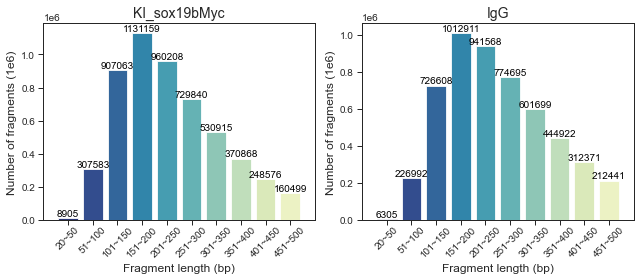

In [ ]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,2, figsize = (9,4), tight_layout = True)
    i = 0
    for k in ['KI_sox19bMyc', 'IgG'] :
        ax = axes[i]
        h = sns.barplot(y = fragment_len_df_50bp[k]['number'],
                    x = fragment_len_df_50bp[k]['50bp'], 
                    palette = 'YlGnBu_r',
#                     orient = 'v',
                    ax = ax)
        ax.set_xlim(-1,10)
        ax.set_xticks(range(10))
        ax.set_xticklabels(fragment_len_df_50bp[k]['frag_len_interval'].tolist(), va = 'center_baseline', rotation = 45)
    #     ax.set_xscale('log')
        ax.set_xlabel('Fragment length (bp)')
        ax.set_ylabel('Number of fragments (1e6)')
        ax.set_title(k)
        
        s = 0
        for p in h.patches:
            s+= p.get_height()
        for p in h.patches :
            if p.get_height() != 0 :
                ax.text(p.get_x() + p.get_width()/2.,
                        p.get_height(),
                        '{}'.format(int(p.get_height())), 
                        fontsize=10,
                        color='black',
                        ha='center',
                        va='bottom')
        
        
        fig.savefig(f'/mnt/Storage/home/wangyiman/knock_in_Sun/figures/make2_bar_fragmentLen_KISox19b_IgG.pdf',transparent=True)
        i += 1

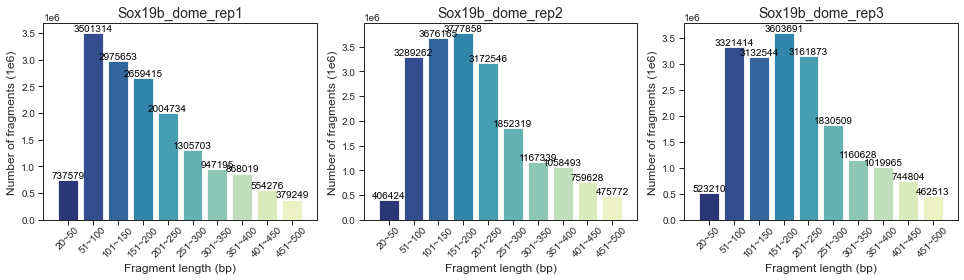

In [ ]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,3, figsize = (13.5,4), tight_layout = True)
    i = 0
    for k in ['Sox19b_dome_rep1', 'Sox19b_dome_rep2', 'Sox19b_dome_rep3'] :
        ax = axes[i]
        h = sns.barplot(y = fragment_len_df_50bp[k]['number'],
                    x = fragment_len_df_50bp[k]['50bp'], 
                    palette = 'YlGnBu_r',
#                     orient = 'v',
                    ax = ax)
        ax.set_xlim(-1,10)
        ax.set_xticks(range(10))
        ax.set_xticklabels(fragment_len_df_50bp[k]['frag_len_interval'].tolist(), va = 'center_baseline', rotation = 45)
#         ax.set_yscale('log')
        ax.set_xlabel('Fragment length (bp)')
        ax.set_ylabel('Number of fragments (1e6)')
        ax.set_title(k)
        
        s = 0
        for p in h.patches:
            s+= p.get_height()
        for p in h.patches :
            if p.get_height() != 0 :
                ax.text(p.get_x() + p.get_width()/2.,
                        p.get_height(),
                        '{}'.format(int(p.get_height())), 
                        fontsize=10,
                        color='black',
                        ha='center',
                        va='bottom')
        
        
        fig.savefig(f'/mnt/Storage/home/wangyiman/knock_in_Sun/figures/make2_bar_fragmentLen_Sox19bFitCR.pdf',transparent=True)
        i += 1

# bar plot

In [ ]:
qPCR_df = pd.read_csv('mutation_genes_qPCR.txt', header = 0, sep = '\t')
order = []
for i in qPCR_df['Gene symbol'] :
    if i == 'foxa3 (site1&2)' :
        order.append(1)
    elif i == 'foxa3 (site1)' :
        order.append(2)
    elif i == 'foxa3 (site2)' :
        order.append(3)
    elif i == 'dharma' :
        order.append(4)
    elif i == 'fgfr4' :
        order.append(5)
    else :
        order.append(6)
        
        
qPCR_df['order'] = order
qPCR_df

,Targets,Relative expression,Gene symbol,order
0,chr5,1.092438,hist1h4l,6
1,chr5,0.925978,hist1h4l,6
2,chr5,1.336211,hist1h4l,6
3,chr15,0.493581,dharma,4
4,chr15,0.602828,dharma,4
5,chr15,0.652886,dharma,4
6,chr21,0.788883,fgfr4,5
7,chr21,0.803496,fgfr4,5
8,chr21,0.744158,fgfr4,5
9,chr18-1,1.246669,foxa3 (site1),2


In [ ]:
qPCR_df.sort_values('order')['Gene symbol'].unique()

array(['foxa3 (site1&2)', 'foxa3 (site1)', 'foxa3 (site2)', 'dharma',
       'fgfr4', 'hist1h4l'], dtype=object)

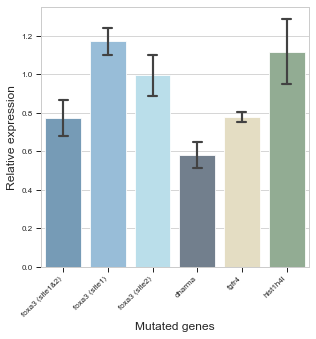

In [ ]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    sns.barplot(
        x='order',
        y='Relative expression',
        data=qPCR_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
    ax.set_xticklabels(labels=qPCR_df.sort_values('order')['Gene symbol'].unique(),
                       rotation=45, ha = 'right')
    ax.set_ylabel('Relative expression')
    ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig4F_barplot_qPCR.pdf', transparent=True)